# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# Importing DataSet

In [2]:
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df["Text"][4]

'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.'

In [4]:
df.shape

(568454, 10)

# Exploratory Data Analysis

In [5]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

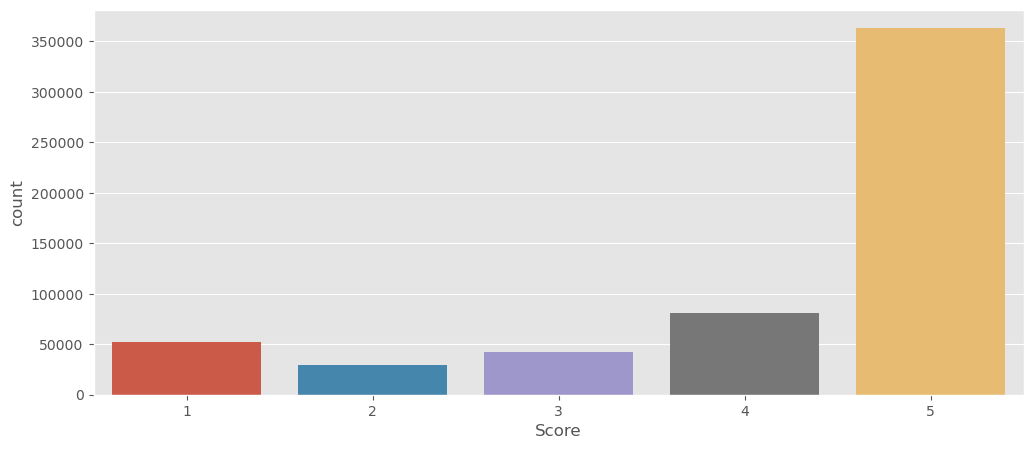

In [6]:
plt.figure(figsize = (12,5))
sns.countplot(data =df,x = 'Score');

**Findings:**

    Our dataset contains more positive reviews than negative reviews; in other words it is biased towards positive data 

In [7]:
df["Score"] = df["Score"].map({1: "Negative", 2: "Negative", 3: "Negative", 4: "Positive", 5: "Positive"})

In [8]:
df.Score.value_counts()

Positive    443777
Negative    124677
Name: Score, dtype: int64

### Finding most words used in positive and negative reviews

In [9]:
df2=df[:10]

In [10]:
positive_review=list(df[df["Score"] == "Positive"]['Text'])
negative_review=list(df[df["Score"] == "Negative"]['Text'])

In [11]:
positive_review

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.',
 'I got a wild hair for taffy and ordered this five pound bag. The taffy

In [12]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt 

In [13]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

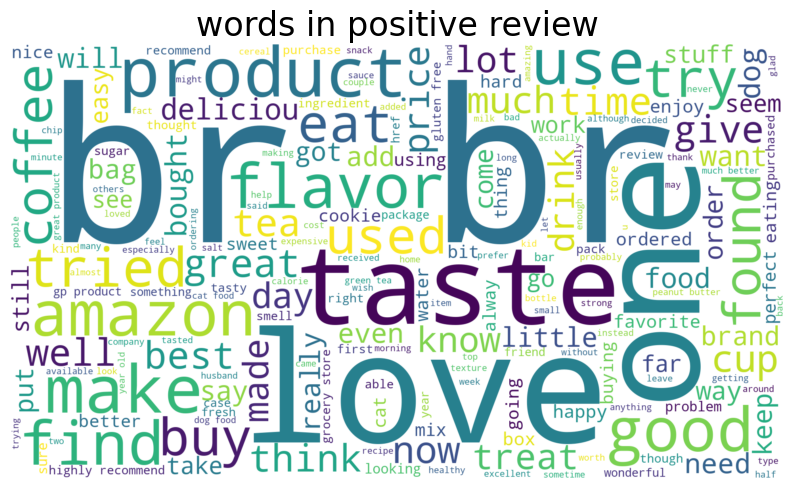

In [14]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

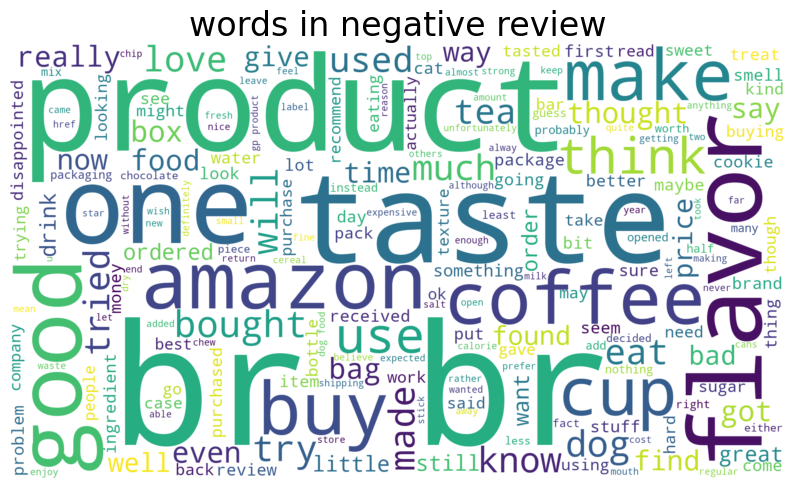

In [15]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

# Data Preprocessing

#### Cleaning our data

In [16]:
def text_processing(data,review):
    digit = '1234567890'
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data[review].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = sentance.lower()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords )
        preprocessed_reviews.append(sentance.strip())
    
    new_preprocessed_reviews=[]
    for sentennce in preprocessed_reviews:
        for char in sentennce:
            if char in digit:
                sentennce = sentennce.replace(char,'')
        new_preprocessed_reviews.append(sentennce)
    # removing punctuations   
    import string
    translator = str.maketrans('', '', string.punctuation)
    new_preprocessed_reviews = [sentence.translate(translator) for sentence in new_preprocessed_reviews]
                
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in new_preprocessed_reviews:
      list1=[]
      for words in sentence.split():
            list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)


In [17]:
df['cleaned_review']=text_processing(df,'Text')

100%|████████████████████████████████████████████████████████████████████████| 568454/568454 [02:02<00:00, 4628.98it/s]


In [18]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found it...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...


In [19]:
df['Text'][60]

'Watch your prices with this.  While the assortment was good, and I did get this on a gold box purchase, the price for this was<br />$3-4 less at Target.'

In [20]:
df['cleaned_review'][60]

'watch price thi assort good gold box purchas price less target'

#### Removing Duplicated reviews

In [21]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'cleaned_review'],
      dtype='object')

In [22]:
df = df.sort_values(["ProductId"])

In [23]:
duplicate_df = df[df.duplicated(subset=['UserId', 'ProfileName','Time','Text','cleaned_review'],keep=False)]

In [24]:
duplicate_df.shape

(232415, 11)

In [25]:
final_df = df.drop_duplicates(subset=['UserId', 'ProfileName','Time','Text','cleaned_review'],keep='first')

In [26]:
final_df.shape

(393933, 11)

#### Removing unrealistic rows

In [27]:
# HelpfulnessNumerator should always be less than HelpfulnessDenominator

In [28]:
final_df[final_df['HelpfulnessNumerator']>final_df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_review
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,Positive,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,son love spaghetti hesit order him say great t...
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,Positive,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,almost love first bite perfectli roast almond ...


In [29]:
final_df = final_df[final_df['HelpfulnessNumerator']<=final_df['HelpfulnessDenominator']]

In [30]:
final_df.shape

(393931, 11)

# Feature Engineering

#### Converting text to vectors 

In [31]:
df2 = final_df.sample(10000)
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_review
54640,54641,B0031H4DBQ,AYZQ0AEQEXO4K,shirley oppenheimer,0,0,Positive,1293321600,most delicious coffee and candy combination,Biting into a Pocket Caffe is a surprise and a...,bite pocket caff surpris pleasur interior expr...
66421,66422,B0058DA0H2,AR1OKXL1TR8AU,Toni,0,0,Positive,1311984000,Delicious... Incredibly delicious!,I am so glad I can now get Oloves from amazon ...,glad now olov amazon us reason buy flight snac...
352521,352522,B00513J4PS,AD49674EWA74I,A. Lawless,1,1,Positive,1335744000,Another Fussie Cat Favorite!,After purchasing Fussie Cat food I will defini...,purchas fussi cat food will definit go back po...
311231,311232,B000HD3YDU,A7WZDHENQZS62,Janette M. Lutz,5,7,Negative,1201564800,"Soup's ok, but....",I buy this brand at the supermarket so I thoug...,buy brand supermarket thought good altern reta...
94973,94974,B0070CGXN4,A12IRGQLFE4EBA,"Christine ""If at first you don't succeed, try...",0,0,Negative,1339804800,Very Weak/ No Substance,I purchased the Veranda Blonde at my local Sta...,purchas veranda blond local starbuck offer goo...


In [32]:
df2['Sentiment'] = df2['Score'].apply(lambda x: 1 if x == 'Positive' else 0)

In [33]:
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_review,Sentiment
54640,54641,B0031H4DBQ,AYZQ0AEQEXO4K,shirley oppenheimer,0,0,Positive,1293321600,most delicious coffee and candy combination,Biting into a Pocket Caffe is a surprise and a...,bite pocket caff surpris pleasur interior expr...,1
66421,66422,B0058DA0H2,AR1OKXL1TR8AU,Toni,0,0,Positive,1311984000,Delicious... Incredibly delicious!,I am so glad I can now get Oloves from amazon ...,glad now olov amazon us reason buy flight snac...,1
352521,352522,B00513J4PS,AD49674EWA74I,A. Lawless,1,1,Positive,1335744000,Another Fussie Cat Favorite!,After purchasing Fussie Cat food I will defini...,purchas fussi cat food will definit go back po...,1
311231,311232,B000HD3YDU,A7WZDHENQZS62,Janette M. Lutz,5,7,Negative,1201564800,"Soup's ok, but....",I buy this brand at the supermarket so I thoug...,buy brand supermarket thought good altern reta...,0
94973,94974,B0070CGXN4,A12IRGQLFE4EBA,"Christine ""If at first you don't succeed, try...",0,0,Negative,1339804800,Very Weak/ No Substance,I purchased the Veranda Blonde at my local Sta...,purchas veranda blond local starbuck offer goo...,0


# Spliting the data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df2[["HelpfulnessNumerator","HelpfulnessDenominator","cleaned_review"]]
y = df2.Sentiment.values

In [36]:
y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

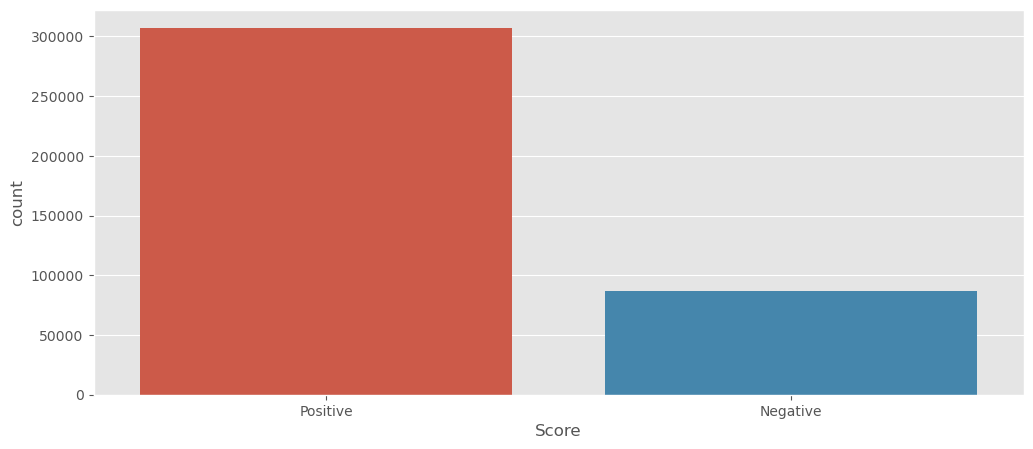

In [37]:
plt.figure(figsize = (12,5))
sns.countplot(data=final_df,x = final_df["Score"]);

#### Since our dataset is imbalanced we will try to make sure same amount of positive and negative score/sentiment are in our training and testing data.  

In [38]:
# Split the dataset into training and testing sets, stratifying by the labels
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Further split the training and validation sets, stratifying by the labels
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(6400, 3)
(6400,)
(1600, 3)
(1600,)


In [40]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24,stratify=y)

In [41]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# Bag of Words

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect =CountVectorizer()
count_vect.fit(X_train.cleaned_review)
print("some feature names: ", count_vect.get_feature_names_out()[:30])
print("="*50)

some feature names:  ['aa' 'aachen' 'aback' 'abandon' 'abbey' 'abdomin' 'abhor' 'abil' 'abj'
 'abject' 'abl' 'ablt' 'abomin' 'abou' 'about' 'abov' 'aboveplac' 'abrad'
 'abrubt' 'absenc' 'absoletli' 'absolut' 'absolutelyaw' 'absolutli'
 'absorb' 'absorpt' 'absoult' 'absout' 'abt' 'abund']


In [43]:
final_vectors = count_vect.transform(X_train.cleaned_review)

In [44]:
final_vectors

<6400x16760 sparse matrix of type '<class 'numpy.int64'>'
	with 207350 stored elements in Compressed Sparse Row format>

In [45]:
final_vectors.shape

(6400, 16760)

#### Adding other num features to the final vector

In [46]:
nm_feats = X_train[['HelpfulnessNumerator','HelpfulnessDenominator']].values

In [47]:
from scipy import sparse

training_data = sparse.hstack((nm_feats,final_vectors))

training_data.shape

(6400, 16762)

# Predicting with Basic Classification Models

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
 
li_model = LogisticRegression(max_iter=20000)

In [49]:
li_model.fit(training_data,y_train)

LogisticRegression(max_iter=20000)

In [50]:
final_test_vectors = count_vect.transform(X_val.cleaned_review.values)
final_test_vectors.shape

(1600, 16760)

In [51]:
test_nm_feats = X_val[['HelpfulnessNumerator','HelpfulnessDenominator']].values
test_data = sparse.hstack((test_nm_feats,final_test_vectors))

test_data.shape

(1600, 16762)

In [52]:

preds = li_model.predict(test_data)


In [54]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_val,preds))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       360
           1       0.89      0.94      0.91      1240

    accuracy                           0.86      1600
   macro avg       0.82      0.76      0.79      1600
weighted avg       0.86      0.86      0.86      1600



#### Using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression(max_iter=100000)

# hyperparameter grid
param_grid = {'penalty': ['l1', 'l2'], 
              'C': [0.01, 0.1, 1, 10, 100], 
              'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(lr_model, param_grid, cv=5)

grid_search.fit(training_data,y_train)

print("Best hyperparameters: ", grid_search.best_params_)

lr_model_best = LogisticRegression(**grid_search.best_params_)
lr_model_best.fit(training_data,y_train)

test_accuracy = lr_model_best.score(test_data, y_val)
print("Test accuracy: ", test_accuracy)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy =  accuracy_score(y_val,preds)
accuracy_df = accuracy_df.append({'Model': "Logistic Regression", 'Accuracy': accuracy}, ignore_index=True)
accuracy_df

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh_model = KNeighborsClassifier()

In [ ]:
neigh_model.fit(training_data,y_train)

In [ ]:
preds = neigh_model.predict(test_data)

In [ ]:
print(classification_report(y_val,preds))

#### Grid Search for KNN Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors': list(range(10,30,2))}

In [ ]:
neigh = KNeighborsClassifier()

In [ ]:
gs= GridSearchCV(neigh,param_grid=param_grid,n_jobs=-1,cv=5)

In [ ]:
KNN_gs_model = gs.fit(training_data,y_train)

In [ ]:
preds_gs = KNN_gs_model.predict(test_data)

In [ ]:
KNN_gs_model.best_params_

In [ ]:
print(classification_report(y_val,preds_gs))

In [ ]:
accuracy =  accuracy_score(y_val,preds_gs)
accuracy_df = accuracy_df.append({'Model': "KNeighbors Classifier", 'Accuracy': accuracy}, ignore_index=True)
accuracy_df

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
plt.figure(figsize = (12,5))
sns.heatmap(confusion_matrix(y_val,preds_gs),annot =True,cmap='viridis')

In [ ]:
pd.crosstab(y_val,preds_gs)

In [ ]:
KNN_gs_model.predict_proba(test_data)[:,1].shape

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
y_val.shape

In [ ]:
fpr,tpr,thresholds = roc_curve(y_val,KNN_gs_model.predict_proba(test_data)[:,1])

In [ ]:
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.0])
plt.title("ROC Curve for KNN Model")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,color = 'b',lw = 2)
plt.show()

In [ ]:
roc_auc_score(y_val,KNN_gs_model.predict_proba(test_data)[:,1])

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score


models = [
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier(), 'hyperparameters': {'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4]}},
    {'name': 'Random Forest', 'model': RandomForestClassifier(), 'hyperparameters': {'n_estimators': [50, 100, 200, 400], 'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'max_features': ['sqrt', 'log2', None]}},
    {'name': 'XGBoost', 'model': XGBClassifier(), 'hyperparameters': {'n_estimators': [50, 100, 200, 400], 'max_depth': [5, 10, 15, 20], 'min_child_weight': [1, 2, 3, 4], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'subsample': [0.5, 0.8, 1.0], 'colsample_bytree': [0.5, 0.8, 1.0], 'gamma': [0, 0.1, 0.2, 0.3, 0.4]}}
]

# Create an empty DataFrame to store the test accuracies
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])


for model_dict in models:
    name = model_dict['name']
    model = model_dict['model']
    hyperparameters = model_dict['hyperparameters']
    
    # Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV
    if name == 'Decision Tree':
        search = GridSearchCV(model, hyperparameters, cv=5)
    else:
        search = RandomizedSearchCV(model, hyperparameters, n_iter=100, cv=5, n_jobs=-1)
    
    search.fit(training_data, y_train)
    best_model = search.best_estimator_
    

    y_pred = best_model.predict(test_data)
    accuracy = accuracy_score(y_val, y_pred)
    
   
    accuracy_df = accuracy_df.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)


accuracy_df


In [ ]:
accuracy_df.sort_values(by= "Accuracy",ascending=False)

# Conclusion

We are getting XGBoost Classifier as our best model for predicting sentiment for Amazon Fine Foods Dataset